In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Master_File_Housing_Data_LogisticReg2.csv')

df= dataset.dropna(how='any', subset=['CONSTRUCTIONTYPE'])
df['BELOWGROUNDAREA'].fillna(0,inplace=True)

X = df.iloc[:,2:-2].values
y = df.iloc[:,14].values

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean') 
imputer.fit(X[:,[1,3,5,6,7,8,10]])
X[:,[1,3,5,6,7,8,10]]= imputer.transform(X[:,[1,3,5,6,7,8,10]])

#print(X[0])
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 9] = labelencoder.fit_transform(X[:, 9])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0,9])
data = onehotencoder.fit_transform(X).toarray()
#print(data[0])
X2 = data[:,[0,1,2,3,4,5,6,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25]]
NewData=X2

X_sig = NewData[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21,22,23]]
print(X_sig[0])


import statsmodels.api as sm


#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)



C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.


[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 3.4300e+02 1.1634e+04 1.0000e+00
 1.0000e+00 0.0000e+00 9.1500e+04]


PCA with 2 Components

C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


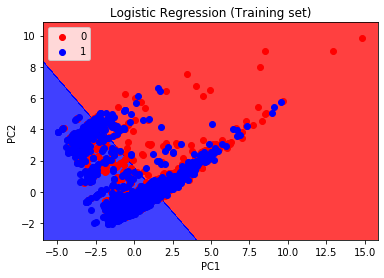

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


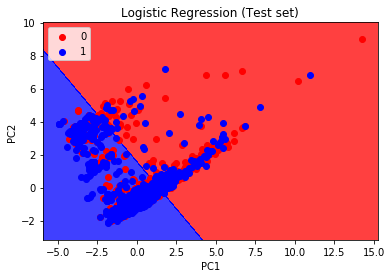

In [2]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Applying PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=2)
X_train = pcaObj.fit_transform(X_train)
X_test = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [3]:
cm

array([[209, 561],
       [161, 775]], dtype=int64)

In [4]:
#Model Accuracy
print("Model Accuracy PCA 2 Components=", classifierObj.score(X_test,y_test))

Model Accuracy PCA 2 Components= 0.5767878077373975


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Master_File_Housing_Data_LogisticReg2.csv')

df= dataset.dropna(how='any', subset=['CONSTRUCTIONTYPE'])
df['BELOWGROUNDAREA'].fillna(0,inplace=True)

X = df.iloc[:,2:-2].values
y = df.iloc[:,14].values

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean') 
imputer.fit(X[:,[1,3,5,6,7,8,10]])
X[:,[1,3,5,6,7,8,10]]= imputer.transform(X[:,[1,3,5,6,7,8,10]])

#print(X[0])
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 9] = labelencoder.fit_transform(X[:, 9])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0,9])
data = onehotencoder.fit_transform(X).toarray()
#print(data[0])
X2 = data[:,[0,1,2,3,4,5,6,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25]]
NewData=X2

X_sig = NewData[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21,22,23]]
print(X_sig[0])


import statsmodels.api as sm


#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)


[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 3.4300e+02 1.1634e+04 1.0000e+00
 1.0000e+00 0.0000e+00 9.1500e+04]


C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.


C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


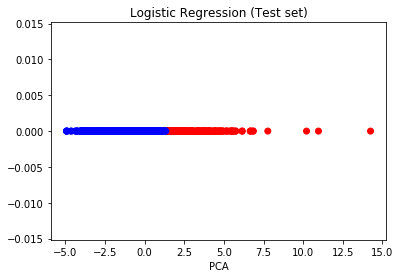

In [6]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Applying PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=1)
X_train = pcaObj.fit_transform(X_train)
X_test = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.scatter(X_test,y_test*0, c=y_pred, cmap = ListedColormap(('red', 'blue')))
plt.title('Logistic Regression (Test set)')
plt.xlabel('PCA')
plt.show()



In [7]:
#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_pred = classifierObj.predict(X_test)
print('Model Accuracy:', classifierObj.score(X_test,y_test))

[[172 598]
 [134 802]]
Model Accuracy: 0.570926143024619


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Master_File_Housing_Data_LogisticReg2.csv')
#dataset = pd.read_csv('Master_File_Housing_Data.csv')

df= dataset.dropna(how='any', subset=['CONSTRUCTIONTYPE'])
df['BELOWGROUNDAREA'].fillna(0,inplace=True)

X = df.iloc[:,2:-2].values
y = df.iloc[:,14].values

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean') 
imputer.fit(X[:,[1,3,5,6,7,8,10]])
X[:,[1,3,5,6,7,8,10]]= imputer.transform(X[:,[1,3,5,6,7,8,10]])

#print(X[0])
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 9] = labelencoder.fit_transform(X[:, 9])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0,9])
data = onehotencoder.fit_transform(X).toarray()
#print(data[0])
NewData = data[:,[0,1,2,3,4,5,6,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25]]

X_sig = NewData[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21,22,23]]
print(X_sig[0])

import statsmodels.api as sm

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Applying PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=None)
X_train = pcaObj.fit_transform(X_train)
X_test = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#plt.scatter(X_test,y_test*0, c=y_pred, cmap = ListedColormap(('red', 'blue')))
#plt.title('Logistic Regression (Test set)')
#plt.xlabel('PCA')
#plt.show()

y_pred = classifierObj.predict(X_test)
print('Model Accuracy:', classifierObj.score(X_test,y_test))

[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 3.4300e+02 1.1634e+04 1.0000e+00
 1.0000e+00 0.0000e+00 9.1500e+04]
[[343 427]
 [243 693]]
Model Accuracy: 0.6072684642438453


C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.


PCA results
2 components: 57.68% 0.5767878077373975
1 Component: 58.09% 0.570926143024619
None: 60.72% 0.6072684642438453